In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
_69 = list(range(1,70))
_26 = list(range(1,27))

In [3]:
url = "https://www.texaslottery.com/export/sites/lottery/Games/Powerball/Winning_Numbers/index.html_2013354932.html"
history = pd.read_html(url)

In [4]:
history=history[0]

In [5]:
history = history[history['Draw Date'].str.len()==10].copy()

In [6]:
history['Draw Date'] = pd.to_datetime(history['Draw Date'])

In [7]:
history = history[history['Draw Date']>='2015-10-07'].copy()

In [8]:
history[['n1','n2','n3','n4','n5']]=history['Winning Numbers'].str.split(" - ",expand=True)

In [9]:
history[['n1','n2','n3','n4','n5','Powerball']] = history[['n1','n2','n3','n4','n5','Powerball']].astype(int)

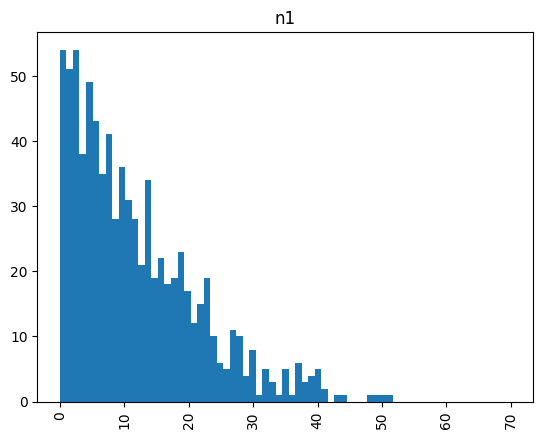

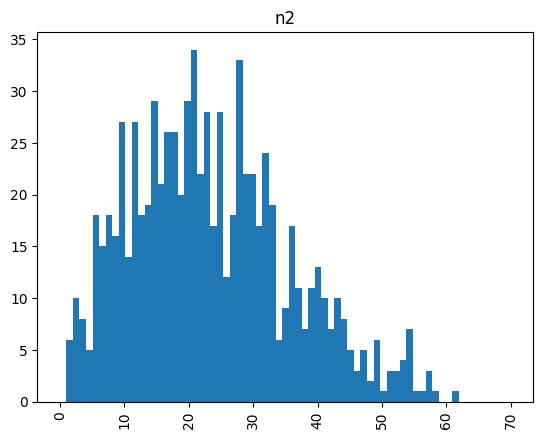

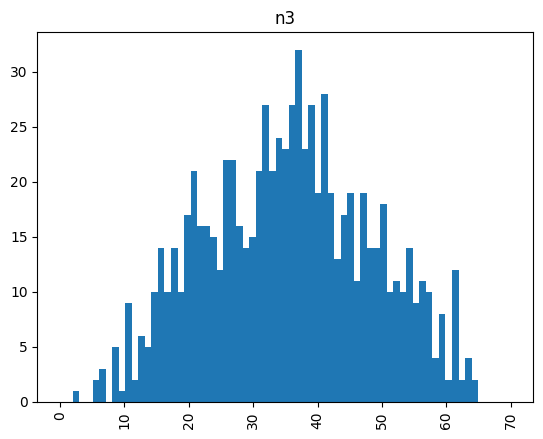

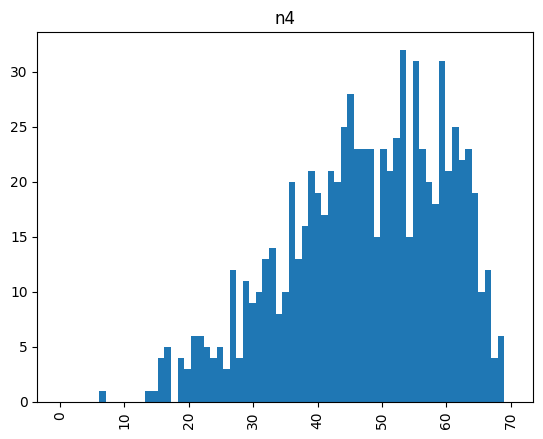

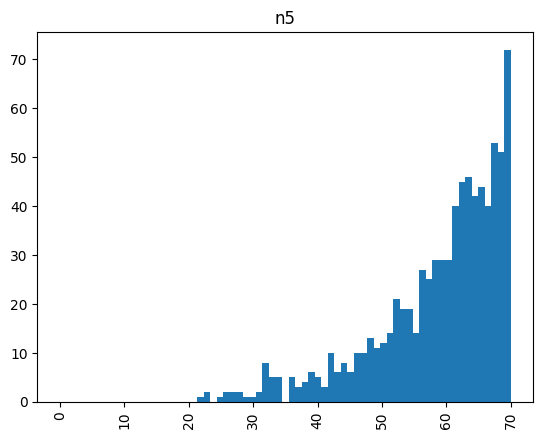

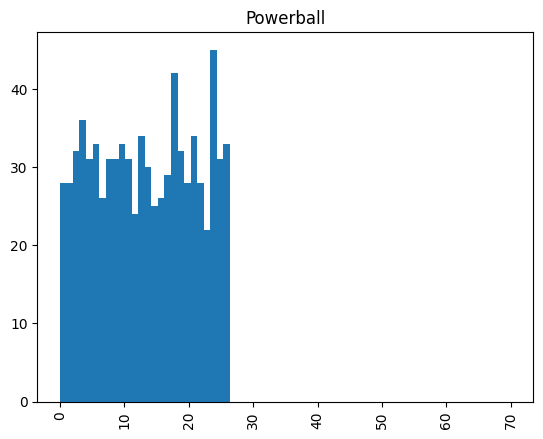

In [11]:
for c in ['n1','n2','n3','n4','n5','Powerball']:

    plt.hist(history[c],bins=np.linspace(0,70,70))
    plt.title(c)
    plt.xticks(rotation=90)
    plt.show()


(array([ 0., 66., 58., 55., 65., 53., 56., 76., 73., 63., 63., 44., 52.,
        51., 55., 60., 50., 52., 60., 54., 52., 51., 62., 67., 56., 65.,
        53., 52., 58., 65., 66., 46., 59., 41., 71., 63., 62., 64., 47.,
        63., 73., 59., 51., 60., 45., 55., 51., 57., 56., 70., 63., 49.,
        45., 62., 58., 57., 51., 76., 66., 57., 64., 59., 67., 58., 64.,
        46., 66., 48., 50., 63.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70.]),
 <BarContainer object of 70 artists>)

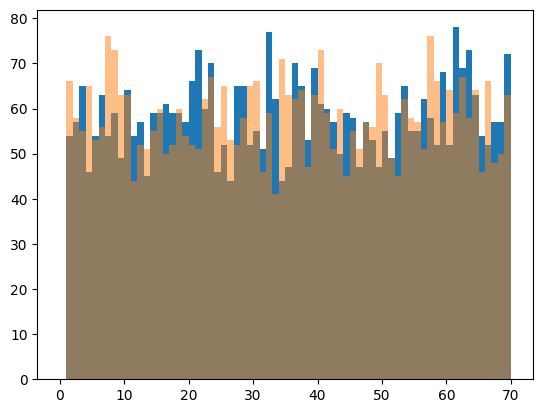

In [12]:
all_draws = history[['Draw Date','n1','n2','n3','n4','n5']].melt(id_vars=['Draw Date'])

plt.hist(all_draws['value'],bins=np.linspace(0,70,71))
all_samp = []
for i in range(803):
    _69 = list(range(1,70))
    samp = random.sample(_69,5)
    all_samp = all_samp+samp

plt.hist(all_samp,bins=np.linspace(0,70,71),alpha=.5)

In [15]:
for c in ['n1','n2','n3','n4','n5']:
    history[f'{c}_shift'] = history[c].shift(1)

In [25]:
all_draws.sort_values(by=['Draw Date','variable'],ascending=[False,True],inplace=True)

In [41]:
last5 = list(all_draws['value'].head(5))

n = 5

np.nanmedian(history[history[f'n{n}']==last5[n-1]][f'n{n}_shift'])


62.0

In [44]:
history['Powerball_shift'] = history['Powerball'].shift(1)

In [46]:
np.nanmedian(history[history['Powerball']==20]['Powerball_shift'])

18.0

In [51]:
np.nanmedian(history[['n1','n2','n3','n4','n5','Powerball']],axis=0)

array([10., 22., 36., 48., 61., 14.])

In [52]:
modes = []
for i in ['n1','n2','n3','n4','n5','Powerball']:

    modes.append(history.groupby([i]).agg({'Draw Date':'count'}).sort_values(by='Draw Date',ascending=False).head(1).index[0])

modes

[1, 21, 37, 53, 69, 24]

In [53]:
frequencies = all_draws.groupby(['value']).agg({'variable':'count'}).reset_index()

In [54]:
frequencies['likelihood'] = frequencies['variable']/sum(frequencies['variable'])

In [56]:
frequencies.sort_values(by='likelihood',ascending=False).head(5)

,value,variable,likelihood
60,61,78,0.019427
31,32,77,0.019178
62,63,73,0.018182
20,21,73,0.018182
68,69,72,0.017933


In [ ]:
pd.set_option("display.max_rows",70)

In [58]:
history

,Draw Date,Winning Numbers,Powerball,Power Play,Estimated Jackpot,Jackpot Winners,Jackpot Option,n1,n2,n3,n4,n5,n1_shift,n2_shift,n3_shift,n4_shift,n5_shift,Powerball_shift
0,2022-11-05,28 - 45 - 53 - 56 - 69,20,3,$1.60 Billion,Roll,NaN,28,45,53,56,69,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-02,2 - 11 - 22 - 35 - 60,23,2,$1.20 Billion,Roll,NaN,2,11,22,35,60,28.0,45.0,53.0,56.0,69.0,20.0
2,2022-10-31,13 - 19 - 36 - 39 - 59,13,3,$1.00 Billion,Roll,NaN,13,19,36,39,59,2.0,11.0,22.0,35.0,60.0,23.0
3,2022-10-29,19 - 31 - 40 - 46 - 57,23,3,$825 Million,Roll,NaN,19,31,40,46,57,13.0,19.0,36.0,39.0,59.0,13.0
4,2022-10-26,19 - 36 - 37 - 46 - 56,24,2,$700 Million,Roll,NaN,19,36,37,46,56,19.0,31.0,40.0,46.0,57.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,2015-10-21,30 - 32 - 42 - 56 - 57,11,4,$90 Million,Roll,NaN,30,32,42,56,57,20.0,31.0,56.0,60.0,64.0,2.0
799,2015-10-17,48 - 49 - 57 - 62 - 69,19,3,$80 Million,Roll,NaN,48,49,57,62,69,30.0,32.0,42.0,56.0,57.0,11.0
800,2015-10-14,15 - 20 - 29 - 31 - 40,1,2,$70 Million,Roll,NaN,15,20,29,31,40,48.0,49.0,57.0,62.0,69.0,19.0
801,2015-10-10,12 - 27 - 29 - 43 - 68,1,2,$60 Million,Roll,NaN,12,27,29,43,68,15.0,20.0,29.0,31.0,40.0,1.0


In [84]:
from xgboost import XGBClassifier


In [106]:
shifts = history[['n1','n2','n3','n4','n5','Powerball',
    'n1_shift','n2_shift','n3_shift','n4_shift','n5_shift','Powerball_shift']].copy()
shifts['Draw Num'] = [len(shifts) - i for i in range(len(shifts))]
shifts.sort_values(by='Draw Num',ascending=True,inplace=True)

In [107]:
for i in range(1,70):

    shifts[f"past_{i}"] = np.where((shifts['n1']==i)|
                            (shifts['n2']==i)|
                            (shifts['n3']==i)|
                            (shifts['n4']==i)|
                            (shifts['n5']==i),1,0
                            )
    shifts[f"past_{i}"] =shifts[f"past_{i}"].cumsum()/shifts['Draw Num']


for i in range(1,27):

    shifts[f"past_pb_{i}"] = np.where((shifts['Powerball']==i),1,0
                            )
    shifts[f"past_pb_{i}"] =shifts[f"past_pb_{i}"].cumsum()/shifts['Draw Num']

In [108]:
shifts.head(50)

,n1,n2,n3,n4,n5,Powerball,n1_shift,n2_shift,n3_shift,n4_shift,...,past_pb_17,past_pb_18,past_pb_19,past_pb_20,past_pb_21,past_pb_22,past_pb_23,past_pb_24,past_pb_25,past_pb_26
802,18,30,40,48,52,9,12.0,27.0,29.0,43.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
801,12,27,29,43,68,1,15.0,20.0,29.0,31.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
800,15,20,29,31,40,1,48.0,49.0,57.0,62.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
799,48,49,57,62,69,19,30.0,32.0,42.0,56.0,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
798,30,32,42,56,57,11,20.0,31.0,56.0,60.0,...,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
797,20,31,56,60,64,2,4.0,54.0,56.0,62.0,...,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
796,4,54,56,62,63,10,9.0,20.0,25.0,47.0,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
795,9,20,25,47,68,7,2.0,12.0,17.0,20.0,...,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
794,2,12,17,20,65,17,7.0,16.0,25.0,50.0,...,0.111111,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
793,7,16,25,50,53,15,4.0,26.0,32.0,55.0,...,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [121]:
features = ['n1','n2','n3','n4','n5','Powerball']+[i for i in shifts.columns if 'past_' in i]
kpi = 'n1_shift'

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_mask = np.min(shifts[[i for i in shifts.columns if 'past_' in i]],axis=1)>0
training_mask2 = np.max(shifts[[i for i in shifts.columns if 'past_' in i]],axis=1)<.25
X = shifts[training_mask&training_mask2].dropna()[features].copy()
Y = shifts[training_mask&training_mask2].dropna()[kpi].copy()


y_train = le.fit_transform(Y)


In [135]:
mod = XGBClassifier(random_state=42,max_depth=4,n_estimators=25)

mod.fit(X,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=25, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, ...)

In [136]:

y_pred = le.inverse_transform(mod.predict(X))



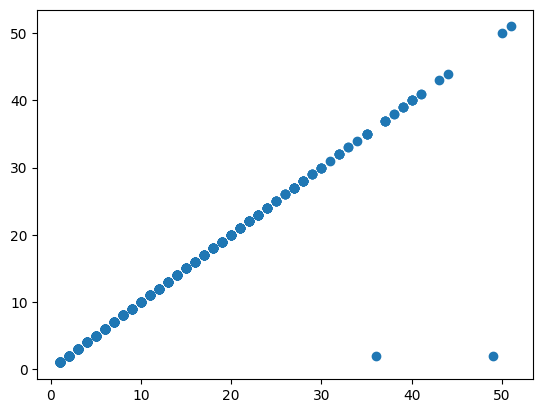

In [137]:
plt.scatter(Y,y_pred)

In [114]:
shifts[f'pred_{kpi}'] = le.inverse_transform(mod.predict(shifts[features]))

In [115]:
shifts

,n1,n2,n3,n4,n5,Powerball,n1_shift,n2_shift,n3_shift,n4_shift,...,past_pb_18,past_pb_19,past_pb_20,past_pb_21,past_pb_22,past_pb_23,past_pb_24,past_pb_25,past_pb_26,pred_n1_shift
802,18,30,40,48,52,9,12.0,27.0,29.0,43.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.0
801,12,27,29,43,68,1,15.0,20.0,29.0,31.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.0
800,15,20,29,31,40,1,48.0,49.0,57.0,62.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.0
799,48,49,57,62,69,19,30.0,32.0,42.0,56.0,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.0
798,30,32,42,56,57,11,20.0,31.0,56.0,60.0,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,19,36,37,46,56,24,19.0,31.0,40.0,46.0,...,0.052566,0.040050,0.033792,0.042553,0.035044,0.025031,0.05632,0.038798,0.041302,19.0
3,19,31,40,46,57,23,13.0,19.0,36.0,39.0,...,0.052500,0.040000,0.033750,0.042500,0.035000,0.026250,0.05625,0.038750,0.041250,13.0
2,13,19,36,39,59,13,2.0,11.0,22.0,35.0,...,0.052434,0.039950,0.033708,0.042447,0.034956,0.026217,0.05618,0.038702,0.041199,2.0
1,2,11,22,35,60,23,28.0,45.0,53.0,56.0,...,0.052369,0.039900,0.033666,0.042394,0.034913,0.027431,0.05611,0.038653,0.041147,28.0


In [119]:
for kpi in ['n1_shift','n2_shift','n3_shift','n4_shift','n5_shift','Powerball_shift']:

    mod = XGBClassifier(random_state=42,max_depth=4,n_estimators=50)

    Y = shifts[training_mask&training_mask2].dropna()[kpi].copy()
    y_train = le.fit_transform(Y)
    
    mod.fit(X,y_train)

    shifts[f'pred_{kpi}'] = le.inverse_transform(mod.predict(shifts[features]))



In [120]:
shifts

,n1,n2,n3,n4,n5,Powerball,n1_shift,n2_shift,n3_shift,n4_shift,...,past_pb_23,past_pb_24,past_pb_25,past_pb_26,pred_n1_shift,pred_n2_shift,pred_n3_shift,pred_n4_shift,pred_n5_shift,pred_Powerball_shift
802,18,30,40,48,52,9,12.0,27.0,29.0,43.0,...,0.000000,0.00000,0.000000,0.000000,4.0,14.0,20.0,49.0,64.0,11.0
801,12,27,29,43,68,1,15.0,20.0,29.0,31.0,...,0.000000,0.00000,0.000000,0.000000,3.0,20.0,50.0,49.0,65.0,2.0
800,15,20,29,31,40,1,48.0,49.0,57.0,62.0,...,0.000000,0.00000,0.000000,0.000000,3.0,3.0,37.0,23.0,60.0,2.0
799,48,49,57,62,69,19,30.0,32.0,42.0,56.0,...,0.000000,0.00000,0.000000,0.000000,3.0,3.0,16.0,23.0,44.0,2.0
798,30,32,42,56,57,11,20.0,31.0,56.0,60.0,...,0.000000,0.00000,0.000000,0.000000,19.0,3.0,16.0,23.0,60.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,19,36,37,46,56,24,19.0,31.0,40.0,46.0,...,0.025031,0.05632,0.038798,0.041302,19.0,31.0,40.0,46.0,57.0,23.0
3,19,31,40,46,57,23,13.0,19.0,36.0,39.0,...,0.026250,0.05625,0.038750,0.041250,13.0,19.0,36.0,39.0,59.0,13.0
2,13,19,36,39,59,13,2.0,11.0,22.0,35.0,...,0.026217,0.05618,0.038702,0.041199,2.0,11.0,22.0,35.0,60.0,23.0
1,2,11,22,35,60,23,28.0,45.0,53.0,56.0,...,0.027431,0.05611,0.038653,0.041147,28.0,45.0,53.0,56.0,69.0,20.0
